In [13]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

In [14]:
realtor = pd.read_csv("../data/RDC_Inventory_Core_Metrics_State_History.csv", low_memory = True)

In [15]:
realtor

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202404,Vermont,VT,464475.0,-0.0303,0.0385,1135.0,0.0202,0.4181,55.0,...,763111.0,-0.0185,0.0217,1605.0,0.0194,0.2960,0.4134,-0.0021,-0.1366,0.0
1,202404,New Jersey,NJ,555000.0,0.0109,0.0714,12400.0,0.0809,0.0594,33.0,...,890363.0,0.0088,0.0415,23718.0,0.0874,0.0238,0.9350,0.0263,-0.0613,0.0
2,202404,Virginia,VA,441000.0,0.0242,-0.0178,12196.0,0.0895,0.1654,36.0,...,656878.0,0.0076,0.0021,23274.0,0.0930,0.0998,0.9165,0.0195,-0.0938,0.0
3,202404,Hawaii,HI,833500.0,-0.0136,-0.0223,4161.0,0.0319,0.3242,67.0,...,1661863.0,0.0010,-0.0320,6069.0,0.0363,0.2132,0.4578,0.0026,-0.1301,0.0
4,202404,Oregon,OR,564305.0,0.0260,-0.0098,9886.0,0.1376,0.3215,45.0,...,757425.0,0.0139,-0.0088,15741.0,0.1310,0.2155,0.5954,-0.0083,-0.1402,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,201607,District of Columbia,DC,579900.0,NaN,NaN,1329.0,NaN,NaN,39.0,...,881363.0,NaN,NaN,1843.0,NaN,NaN,0.3868,NaN,NaN,NaN
4791,201607,Ohio,OH,139900.0,NaN,NaN,45197.0,NaN,NaN,60.0,...,217126.0,NaN,NaN,62222.0,NaN,NaN,0.3862,NaN,NaN,NaN
4792,201607,Louisiana,LA,206900.0,NaN,NaN,17269.0,NaN,NaN,70.0,...,280234.0,NaN,NaN,19642.0,NaN,NaN,0.1372,NaN,NaN,NaN
4793,201607,Nebraska,NE,190000.0,NaN,NaN,4975.0,NaN,NaN,50.0,...,252894.0,NaN,NaN,8691.0,NaN,NaN,0.7381,NaN,NaN,NaN


In [16]:
realtor.columns

Index(['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
 

In [17]:
# Check missing values for each column
realtor.isna().mean()

month_date_yyyymm                          0.000000
state                                      0.000000
state_id                                   0.000209
median_listing_price                       0.000209
median_listing_price_mm                    0.127842
median_listing_price_yy                    0.127842
active_listing_count                       0.000209
active_listing_count_mm                    0.127842
active_listing_count_yy                    0.127842
median_days_on_market                      0.000209
median_days_on_market_mm                   0.127842
median_days_on_market_yy                   0.127842
new_listing_count                          0.000209
new_listing_count_mm                       0.127842
new_listing_count_yy                       0.127842
price_increased_count                      0.000209
price_increased_count_mm                   0.128259
price_increased_count_yy                   0.128050
price_reduced_count                        0.000209
price_reduce

Remove the "_mm" & "_yy" columns

In [18]:
realtor = realtor[['month_date_yyyymm', 'state', 'state_id', 
                   #'postal_code', 'zip_name',
                   'median_listing_price',
       #'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count',
        #'active_listing_count_mm',
       #'active_listing_count_yy',
        'median_days_on_market',
       #'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count',
        #'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count',
        #'price_increased_count_mm',
       #'price_increased_count_yy',
        'price_reduced_count',
       #'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count',
        #'pending_listing_count_mm',
       #'pending_listing_count_yy',
        'median_listing_price_per_square_foot',
       #'median_listing_price_per_square_foot_mm',
       #'median_listing_price_per_square_foot_yy',
        'median_square_feet',
       #'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price',
        #'average_listing_price_mm',
       #'average_listing_price_yy',
        'total_listing_count',
       #'total_listing_count_mm', 'total_listing_count_yy',
        'pending_ratio',
       #'pending_ratio_mm', 'pending_ratio_yy',
        'quality_flag']]

Last row includes some metadata that needs to be removed

In [19]:
realtor = realtor[:-1]

In [20]:
realtor

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag
0,202404,Vermont,VT,464475.0,1135.0,55.0,620.0,8.0,218.0,469.0,265.0,1837.0,763111.0,1605.0,0.4134,0.0
1,202404,New Jersey,NJ,555000.0,12400.0,33.0,9392.0,264.0,2250.0,11595.0,303.0,1709.0,890363.0,23718.0,0.9350,0.0
2,202404,Virginia,VA,441000.0,12196.0,36.0,11466.0,648.0,3722.0,11178.0,221.0,2008.0,656878.0,23274.0,0.9165,0.0
3,202404,Hawaii,HI,833500.0,4161.0,67.0,1530.0,36.0,1046.0,1905.0,725.0,1165.0,1661863.0,6069.0,0.4578,0.0
4,202404,Oregon,OR,564305.0,9886.0,45.0,6062.0,1032.0,4382.0,5886.0,311.0,1864.0,757425.0,15741.0,0.5954,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,201607,Massachusetts,MA,439000.0,21264.0,58.0,8864.0,516.0,5900.0,7002.0,221.0,1964.0,687939.0,28144.0,0.3293,NaN
4790,201607,District of Columbia,DC,579900.0,1329.0,39.0,888.0,20.0,352.0,514.0,476.0,1254.0,881363.0,1843.0,0.3868,NaN
4791,201607,Ohio,OH,139900.0,45197.0,60.0,17472.0,680.0,13824.0,17454.0,86.0,1674.0,217126.0,62222.0,0.3862,NaN
4792,201607,Louisiana,LA,206900.0,17269.0,70.0,5480.0,144.0,4116.0,2370.0,109.0,1920.0,280234.0,19642.0,0.1372,NaN


In [21]:
realtor['month_date_yyyymm'] = pd.to_datetime(realtor['month_date_yyyymm'], format = '%Y%m')

In [22]:
realtor['month_date_yyyymm']

0      2024-04-01
1      2024-04-01
2      2024-04-01
3      2024-04-01
4      2024-04-01
          ...    
4789   2016-07-01
4790   2016-07-01
4791   2016-07-01
4792   2016-07-01
4793   2016-07-01
Name: month_date_yyyymm, Length: 4794, dtype: datetime64[ns]

In [23]:
us_median_listing = realtor.groupby('month_date_yyyymm')['median_listing_price'].mean().reset_index()

<Axes: xlabel='month_date_yyyymm', ylabel='median_listing_price'>

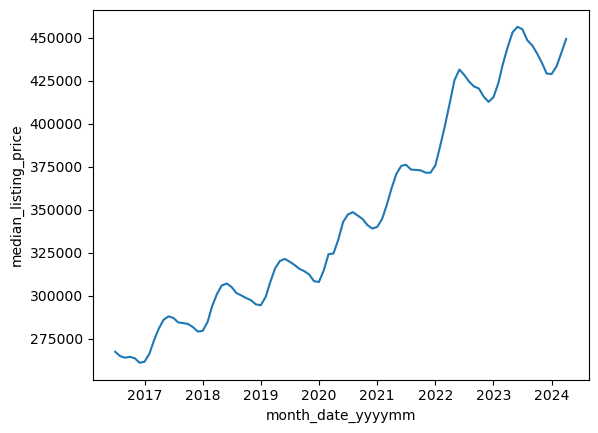

In [24]:
sns.lineplot(data = us_median_listing, x = 'month_date_yyyymm', y = 'median_listing_price')

In [29]:
realtor.to_csv('../data/realtor_housing_metrics_state.csv', index = False)